# Handling Imbalanced Dataset
## Using Random Sampling and SMOTE (Synthethic Minority Over Sampling Technique)
### With `Credit Card Fraud Tendency` Dataset

In [204]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

[Dataset Source](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [205]:
## Import Dataset as DataFrame
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [206]:
## Check Data Information
df.info()
## Result: No missing value detected, all values are in float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [207]:
## Confirm No Missing Value
df.isna().sum()
## Result: Confirmed no missing value

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

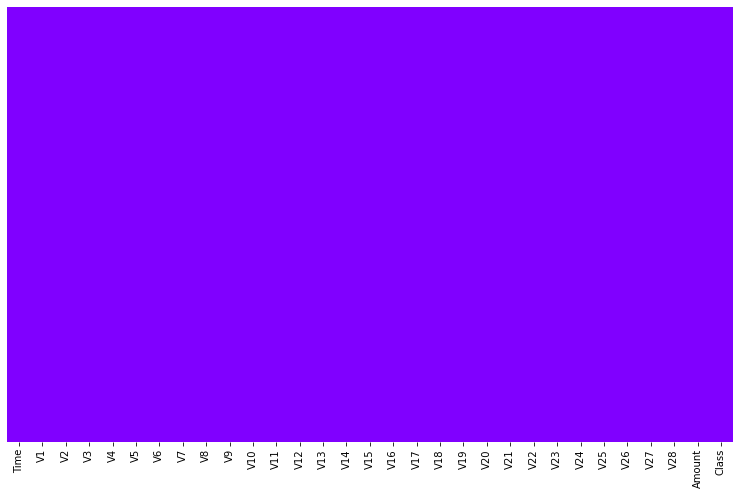

In [208]:
## Visualize with Heatmap
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(), cmap='rainbow', cbar=False, yticklabels=False)
plt.show()

## Check Data Imbalance by Proportion

In [209]:
## Check proportion of values in target
df['Class'].value_counts()
## Result: Imbalanced of values in target column detected

0    284315
1       492
Name: Class, dtype: int64

In [210]:
## Check proportion in percentage
(pd.crosstab(index=df['Class'],columns='Proportion (%)',normalize=True)*100).round(2)
## Result: Imbalanced confirmed

col_0,Proportion (%)
Class,
0,99.83
1,0.17


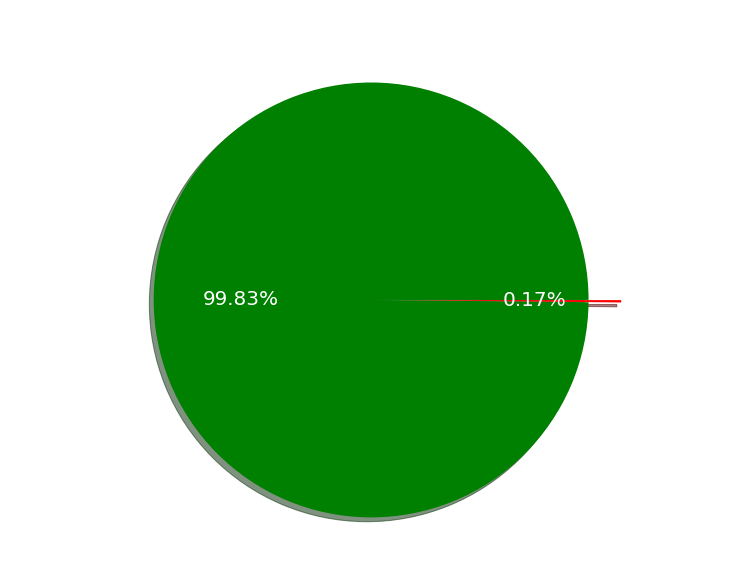

In [211]:
## Visualize with Pie Plot
plt.figure(figsize=(10,10))
plt.pie(df['Class'].value_counts(),labels=['No Fraud (0)','Fraud (1)'],
    colors=['g','r'],
    shadow=True,
    textprops={
        'size':20,
        'color':'w'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.1))
plt.title('Proportion of Values in Target Column',color='w',size=20)
plt.show()

<hr>

## 2. Machine Learning Modelling

### Splitting Data

In [212]:
## Import Package
from sklearn.model_selection import train_test_split

In [213]:
## Define features and target
x = df.drop(columns='Class')
y = df['Class']

In [214]:
## Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.80, random_state=42)

In [215]:
## Check shape of features
print(x_train.shape, x_test.shape)

(227845, 30) (56962, 30)


### Logistic Regression Model

In [216]:
## Import Package
from sklearn.linear_model import LogisticRegression

In [217]:
## Build Model
LR = LogisticRegression()

In [218]:
## Fit Model
LR.fit(x_train, y_train)

LogisticRegression()

### Model - Fraud Detection
- Class 0 - No Fraud Detected -> Negative
- Class 1 - Fraud Detected -> Positive
- **GOALS** : Minimalized False-Negative (no fraud detected but actually it does)

**`Model will focus on Recall Class 1`**


### Evaluation Matrix

In [219]:
## Import package
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

In [220]:
## Create Function to perform Evaluation Matrix scoring for Model
def Eva_Matrix(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    rec_train=recall_score(y_train,y_pred_train)
    prec_train=precision_score(y_train,y_pred_train)
    f1_train=f1_score(y_train,y_pred_train)

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test,y_pred_test)
    rec_test=recall_score(y_test,y_pred_test)
    prec_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data_LR={
    Nama + ' Training':[acc_train,rec_train,prec_train,f1_train],
    Nama + ' Testing':[acc_test,rec_test,prec_test,f1_test]
}

    df_LR=(pd.DataFrame(data_LR,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    cr_train=classification_report(y_train,y_pred_train)
    cm_train=confusion_matrix(y_train,y_pred_train,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    cr_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    return df_LR,cr_train,df_train,cr_test,df_test

## Run Function
df_LR,cr_LR_tr,cm_LR_tr,cr_LR_ts,cm_LR_ts=Eva_Matrix(LR,x_train,x_test,y_train,y_test,'LogReg Base')

In [221]:
## Show Evaluation Matrix
df_LR
## Accuracy score will produce bias as proportion of values in target are imbalanced
### We will focus on recall of Class 1 in classification report of training set below

,Accuracy,Recall,Precision,F1
LogReg Base Training,0.999,0.7487,0.7143,0.7311
LogReg Base Testing,0.999,0.6939,0.7083,0.7010


In [222]:
## Show Classification Report
print(cr_LR_tr, cr_LR_ts)
## Recall score of Class 1 in training and testing set of Base Model are good enough
## Its good because these scores produce by Base Model without any tuning whatsoever
### In general, this imbalanced data may need no further handling as the value characteristics are different
### This resulted in Model could distinguish those values (Fraud and No Fraud) accordingly
#### Therefore, this data actually could be directly used for Feature Engineering and Model Tuning

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.75      0.73       394

    accuracy                           1.00    227845
   macro avg       0.86      0.87      0.87    227845
weighted avg       1.00      1.00      1.00    227845
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [223]:
## Show Confusion Matrix - Training
cm_LR_tr

,Pred 1,Pred 0
Akt 1,295,99
Akt 0,118,227333


In [224]:
## Show Confusion Matrix - Testing
cm_LR_ts

,Pred 1,Pred 0
Akt 1,68,30
Akt 0,28,56836


Confusion Matrix above show 99 False-Negative in training set and 30 False-Negative in testing set.
We will try to minimalize them by handling imbalanced dataset below.
Even though we have stated before that this imbalanced dataset could be used because characteristics in value of target column is different,
we will still try to handle them as Exercise.

<hr>

## 3. Handle Imbalanced Data

In [225]:
## Training Set
df_train=pd.concat([x_train, y_train], axis=1)
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99,0
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90,0
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99,0
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44,0
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76,0


In [226]:
## Check proportion of target column in training set
df_train['Class'].value_counts()
## Value 0 (no fraud) = Majority Class
## Value 1 (fraud) = Minority Class

0    227451
1       394
Name: Class, dtype: int64

In [227]:
## Separate both values to different DataFrames
non_fraud = df_train[df_train['Class'] == 0] ## Majority Class
fraud = df_train[df_train['Class'] == 1] ## Minority Class

### RANDOM SAMPLING - Random Over Sampling
`randomly duplicate` values in Minority Class (fraud) until reaching the same amount of data in Majority Class (non fraud)

In [228]:
## Import Package
from sklearn.utils import resample

In [229]:
## Run Resample Function and Store in DataFrame
fraud_oversample = resample(fraud, # Minority,
                                replace = True, ## Data in DataFrame fraud will be replaced with duplication result
                                n_samples = len(non_fraud), ## number of data in Majority
                                random_state = 42 ## this is RANDOM sampling
                                )

In [230]:
## Combine Oversampled Result (Minority) with Majority Class
df_Oversample = pd.concat([fraud_oversample, non_fraud])
## Check len of new DataFrame (should be 2x original majority class)
len(df_Oversample)

454902

In [231]:
## Len of 2x Majority Class
print(2 * len(non_fraud))
## Result: Oversample Success

454902


In [232]:
## Confirm proportion of values in target columns
df_Oversample['Class'].value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [233]:
## Define features and target of training data after Over Sampling
x_train_ov = df_Oversample.drop(columns='Class')
y_train_ov = df_Oversample['Class']

In [234]:
## Run Evaluation Matrix with Oversampled Result
df_LR_ov,cr_LR_ov_tr,cm_LR_ov_tr,cr_LR_ov_ts,cm_LR_ov_ts=Eva_Matrix(LogisticRegression(),x_train_ov,x_test,y_train_ov,y_test,'LogReg Over Sample')

In [235]:
## Show Classification Report - After OverSampling
print(cr_LR_ov_tr, cr_LR_ov_ts)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    227451
           1       0.95      0.88      0.91    227451

    accuracy                           0.92    454902
   macro avg       0.92      0.92      0.92    454902
weighted avg       0.92      0.92      0.92    454902
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [236]:
## Compared to Classification Report - Before OverSampling
print(cr_LR_tr, cr_LR_ts)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.75      0.73       394

    accuracy                           1.00    227845
   macro avg       0.86      0.87      0.87    227845
weighted avg       1.00      1.00      1.00    227845
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



After using Random Over Sampling method to handle imbalanced data, we produce higher Recall Class 1 score detailed:
- Training Set : 0.75 to 0.88
- Testing Set : 0.69 to 0.92

As Recall score is setoffing Precision score, precision score after Random Over Sampling method are dropping significantly detailed:
- Training Set: 0.71 to 0.95
- Testing Set: 0.71 to 0.03 => `underlying question: we score a very good Recall Class 1 (+) score, do we need to care about this unstable Precision score?`

- Answer: Essentially, increase of recall score will ALWAYS translates to decrease of precision score (set-off), so if we want to still keeping good precision score while increasing recall score, we shall use `F1 Score` instead.

In [286]:
## Confusion Matrix after Random Over Sampling for Testing Set
cm_LR_ov_ts

,Pred 1,Pred 0
Akt 1,90,8
Akt 0,2487,54377


### RANDOM SAMPLING - Random Under Sampling
`randomly eliminate` data from Majority Class (non-fraud) until reaching total data in Minority Class (fraud)

In [237]:
## Re-Separate both values to different DataFrames since data has been changed in Over Sampling
non_fraud = df_train[df_train['Class'] == 0] ## Majority Class
fraud = df_train[df_train['Class'] == 1] ## Minority Class

In [238]:
## Run Resample Function and Store in DataFrame
fraud_undersample = resample(non_fraud, # Majority,
                                replace = True, ## Data in DataFrame fraud will be replaced with duplication result
                                n_samples = len(fraud), ## number of data in Minority
                                random_state = 42 ## this is RANDOM sampling
                                )

In [239]:
## Combine Oversampled Result (Majority) with Minority Class
df_Undersample = pd.concat([fraud_undersample, fraud])
## Check len of new DataFrame (should be 2x original Minority class)
len(df_Undersample)

788

In [240]:
## Len of 2x Minority Class
print(2 * len(fraud))
## Result: Undersample Success

788


In [241]:
## Confirm proportion of values in target columns
df_Undersample['Class'].value_counts()

0    394
1    394
Name: Class, dtype: int64

In [242]:
## Define features and target of training data after Over Sampling
x_train_un = df_Undersample.drop(columns='Class')
y_train_un = df_Undersample['Class']

In [243]:
## Run Evaluation Matrix with Undersampled Result
df_LR_un,cr_LR_un_tr,cm_LR_un_tr,cr_LR_un_ts,cm_LR_un_ts=Eva_Matrix(LogisticRegression(),x_train_un,x_test,y_train_un,y_test,'LogReg Under Sample')

In [244]:
## Show Classification Report - After UnderSampling
print(cr_LR_un_tr, cr_LR_un_ts)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       394
           1       0.96      0.92      0.94       394

    accuracy                           0.94       788
   macro avg       0.94      0.94      0.94       788
weighted avg       0.94      0.94      0.94       788
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.94      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.94      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [245]:
## Compared to Classification Report - Before OverSampling
print(cr_LR_tr, cr_LR_ts)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.75      0.73       394

    accuracy                           1.00    227845
   macro avg       0.86      0.87      0.87    227845
weighted avg       1.00      1.00      1.00    227845
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



After using Random Under Sampling method to handle imbalanced data, we produce higher Recall Class 1 score detailed:
- Training Set : 0.75 to 0.92 
- Testing Set : 0.69 to 0.94

This is even higher recall (+) score than using Random Over Sampling method below:

- Training Set : 0.75 to 0.88
- Testing Set : 0.69 to 0.92

#### Confusion Matrix

In [246]:
## Confusion Matrix for Testing Set after Under Sampling
cm_LR_un_ts

,Pred 1,Pred 0
Akt 1,92,6
Akt 0,3020,53844


In [247]:
## Compared to Confusion Matrix for Testing Set after Over Sampling
cm_LR_ov_ts

,Pred 1,Pred 0
Akt 1,90,8
Akt 0,2487,54377


In [248]:
## Compared to Confusion Matrix for Testing Set before Over and Under Sampling
cm_LR_ts

,Pred 1,Pred 0
Akt 1,68,30
Akt 0,28,56836


- If we compared False-Negative (Actual 1 - Predicted 0) figures in confusion matrix, we could see that number of False-Negative (predicted as no-fraud but in actual it is fraud) which we want to minimize in this project is dropping significantly after handled with Random Sampling, dropping to below 10 from 30 in Base Model even though precision (+) after Random Sampling reaching 0.03. 

- Since Recall (+) score for both Random Under is lower than Random Over, meanwhile number of False-Positive were different by more than 500 cases. As our goals is to produce as low False-Negative as possible, this could be interpreted that result with Random Under Sampling is more desirable.

- Even though total False-Negative and False-Positive aggregately for Base Model (which produced higher accuracy score as well) is higher, customer has tendency to try again for the transactions until Machine (Model) predicted it is not a fraudulent transaction, meanwhile if False-Negative happen, Bank will face huge loss to repair fraudulent transactions compared to customer confusion happen on False-Positive cases.

- What Bank management need to decide is, are 2,400 cases that ended up in customer feeling confused on why their transaction is denied/unsuccesful because the Model/Machine indicate it as a fraudulent transaction are still within acceptable range or will it causing customer churn or produce a bad reputation to the Bank.

### RANDOM SAMPLING - Combination Random Over and Random Under Sampling
`randomly eliminate` data from Majority Class (non-fraud) and `randomly duplicate` data from Minority Class (fraud) until reaching desirable number of  data 

In [249]:
## Re-Separate both values to different DataFrames since data has been changed in Over Sampling
non_fraud = df_train[df_train['Class'] == 0] ## Majority Class
fraud = df_train[df_train['Class'] == 1] ## Minority Class

In [250]:
## Run Resample Function and Store in DataFrame
fraud_oversample = resample(fraud, # Minority,
                                replace = True, ## Data in DataFrame fraud will be replaced with duplication result
                                n_samples = 120000, ## desirable number of data per value
                                random_state = 42 ## this is RANDOM sampling
                                )
                                
fraud_undersample = resample(non_fraud, # Majority,
                                replace = False, ## Data in DataFrame non-fraud will not be replaced with duplication result
                                n_samples = 120000, ## desirable number of data per value
                                random_state = 42 ## this is RANDOM sampling
                                )

In [251]:
## Combine Oversampled Result (Majority) with Minority Class
df_UnderOversample = pd.concat([fraud_oversample, fraud_undersample])

In [252]:
## Confirm proportion of values in target columns (n_samples set at 120,000)
df_UnderOversample['Class'].value_counts()
## Result: Confirmed as number of samples set at Resample function

1    120000
0    120000
Name: Class, dtype: int64

In [253]:
## Define features and target of training data after Over Sampling
x_train_uo = df_UnderOversample.drop(columns='Class')
y_train_uo = df_UnderOversample['Class']

In [254]:
## Run Evaluation Matrix with Undersampled Result
df_LR_uo,cr_LR_uo_tr,cm_LR_uo_tr,cr_LR_uo_ts,cm_LR_uo_ts=Eva_Matrix(LogisticRegression(),x_train_uo,x_test,y_train_uo,y_test,'LogReg Under-Over Sample')

In [255]:
## Show Classification Report - After Combination of Over and Under Sampling
print(cr_LR_uo_tr, cr_LR_uo_ts)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    120000
           1       0.95      0.88      0.91    120000

    accuracy                           0.92    240000
   macro avg       0.92      0.92      0.92    240000
weighted avg       0.92      0.92      0.92    240000
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.92      0.07        98

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.98     56962



In [256]:
## Compared to Classification Report of Base Model
print(cr_LR_tr, cr_LR_ts)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.75      0.73       394

    accuracy                           1.00    227845
   macro avg       0.86      0.87      0.87    227845
weighted avg       1.00      1.00      1.00    227845
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Recall (+) for both training and testing set increased to over 0.85, while precision for testing set after handling showing same unstable result (0.96 for training and 0.04 for testing) as we encounter in using Random Over or Random Under Sampling alone.

In [257]:
## Confusion Matrix for Testing Set after combination of Over - Under Sampling
cm_LR_uo_ts

,Pred 1,Pred 0
Akt 1,90,8
Akt 0,2557,54307


Confusion Matrix show increase in False-Negative and False-Positive number than which produced by Random Over Sampling, therefore, this method could not produced as desirable result as using Over Sampling alone. Since Random Over Sampling produced lower number of False-Positive cases, we choose this method instead of Under or combination of Under-Over. 

#### 2nd Try of Combination of Random Over-Under Sampling with 100,000 data

In [258]:
## Re-Separate both values to different DataFrames since data has been changed in Over Sampling
non_fraud = df_train[df_train['Class'] == 0] ## Majority Class
fraud = df_train[df_train['Class'] == 1] ## Minority Class

In [259]:
## Run Resample Function and Store in DataFrame
fraud_oversample2 = resample(fraud, # Minority,
                                replace = True, ## Data in DataFrame fraud will be replaced with duplication result
                                n_samples = 100000, ## desirable number of data per value
                                random_state = 42 ## this is RANDOM sampling
                                )
                                
fraud_undersample2 = resample(non_fraud, # Majority,
                                replace = False, ## Data in DataFrame non-fraud will not be replaced with duplication result
                                n_samples = 100000, ## desirable number of data per value
                                random_state = 42 ## this is RANDOM sampling
                                )

In [260]:
## Combine Oversampled Result (Majority) with Minority Class
df_UnderOversample2 = pd.concat([fraud_oversample2, fraud_undersample2])

In [261]:
## Confirm proportion of values in target columns (n_samples set at 100,000)
df_UnderOversample2['Class'].value_counts()
## Result: Confirmed as number of samples set at Resample function

1    100000
0    100000
Name: Class, dtype: int64

In [262]:
## Define features and target of training data after Over Sampling
x_train_uo2 = df_UnderOversample2.drop(columns='Class')
y_train_uo2 = df_UnderOversample2['Class']

In [263]:
## Run Evaluation Matrix with Undersampled Result
df_LR_uo2,cr_LR_uo2_tr,cm_LR_uo2_tr,cr_LR_uo2_ts,cm_LR_uo2_ts=Eva_Matrix(LogisticRegression(),x_train_uo2,x_test,y_train_uo2,y_test,'LogReg Under-Over with 100k Sample')

In [264]:
## Show Classification Report - After Combination of Over and Under Sampling with 100k samples each
print(cr_LR_uo2_tr, cr_LR_uo2_ts)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    100000
           1       0.95      0.88      0.91    100000

    accuracy                           0.92    200000
   macro avg       0.92      0.92      0.92    200000
weighted avg       0.92      0.92      0.92    200000
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.92      0.07        98

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.98     56962



Result on classification report did not show any difference with using 120,000 samples for each values in target column.

In [265]:
## Confusion Matrix for Testing Set after Over and Under Sampling with 120,000 samples each
cm_LR_uo2_ts

,Pred 1,Pred 0
Akt 1,90,8
Akt 0,2566,54298


Number of False-Negative remain the same, while False-Positive increase. Still, Random Under Sampling produce the best result.

In [266]:
## Compared to Confusion Matrix for Testing Set after Over Sampling
cm_LR_ov_ts

,Pred 1,Pred 0
Akt 1,90,8
Akt 0,2487,54377


### SMOTE - Synthethic Minority Oversampling Technique
`randomly create synthetic data` from Minority Class (fraud) until reaching total data in Majority Class (non-fraud)

In [272]:
## Import Package
import imblearn
from imblearn.over_sampling import SMOTE

In [273]:
## Build Model
sm = SMOTE(random_state=42)

In [274]:
## Show training features
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76


In [275]:
## Show training target
y_train.head()

223361    0
165061    0
238186    0
150562    0
138452    0
Name: Class, dtype: int64

In [276]:
## Fit Sample
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [278]:
## Combined as Training Set and Check Proportion
df_SMOTE = pd.concat([x_train_sm, y_train_sm], axis=1)
df_SMOTE['Class'].value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [279]:
## Check proportion of Original Training Set
df_train['Class'].value_counts()
## Result: confirmed, new Training Set has same number of data as Majority Class in original set

0    227451
1       394
Name: Class, dtype: int64

In [280]:
## Define features and target of training data after SMOTE
x_train_sm = df_SMOTE.drop(columns='Class')
y_train_sm = df_SMOTE['Class']

In [281]:
## Run Evaluation Matrix with Undersampled Result
df_LR_sm,cr_LR_sm_tr,cm_LR_sm_tr,cr_LR_sm_ts,cm_LR_sm_ts=Eva_Matrix(LogisticRegression(),x_train_sm,x_test,y_train_sm,y_test,'LogReg SMOTE')

In [282]:
## Show Classification Report - After SMOTE
print(cr_LR_sm_tr, cr_LR_sm_ts)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    227451
           1       0.98      0.96      0.97    227451

    accuracy                           0.97    454902
   macro avg       0.97      0.97      0.97    454902
weighted avg       0.97      0.97      0.97    454902
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.89      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [283]:
## Compared with Classification Report - After Random Over Sampling (our best Model so far)
print(cr_LR_ov_tr, cr_LR_ov_ts)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92    227451
           1       0.95      0.88      0.91    227451

    accuracy                           0.92    454902
   macro avg       0.92      0.92      0.92    454902
weighted avg       0.92      0.92      0.92    454902
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962



SMOTE model has better recall(+) score for training set [0.96 compared to 0.88] but lower score for testing set [0.89 compared to 0.92].

In [284]:
## Compared to Confusion Matrix for Testing Set after SMOTE
cm_LR_sm_ts

,Pred 1,Pred 0
Akt 1,87,11
Akt 0,990,55874


In [287]:
## Compared to Confusion Matrix for Testing Set after Random Over Sampling (our best Model so far)
cm_LR_un_ts

,Pred 1,Pred 0
Akt 1,92,6
Akt 0,3020,53844


SMOTE Model produce 3 higher False-Negative cases than Under Sampling but substantially more than 2-third lesser False-Positive cases than Random Under Sampling. Still, Random Under Sampling is our best model in terms of number of False-Negative cases.

<hr>

## 4. Evaluation Matrix

In [288]:
## Import package
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [289]:
## Build function to automatically perform Evaluation Matrix scoring
def Eva_Matrix(model,x_train, x_test, y_train, y_test, Nama):
    Model = model.fit(x_train, y_train)
    y_pred_tr = Model.predict(x_train)
    R2_train = r2_score(y_train, y_pred_tr)
    MAE_train = mean_absolute_error(y_train, y_pred_tr)
    MSE_train = mean_squared_error(y_train, y_pred_tr)
    RMSE_train = np.sqrt(MSE_train)
    y_pred_ts = Model.predict(x_test)
    R2_test = r2_score(y_test, y_pred_ts)
    MAE_test = mean_absolute_error(y_test, y_pred_ts)
    MSE_test = mean_squared_error(y_test, y_pred_ts)
    RMSE_test = np.sqrt(MSE_test)
    eva_data = {
    "Training " + Nama : [R2_train, MAE_train, MSE_train, RMSE_train],
    "Testing " + Nama : [R2_test, MAE_test, MSE_test, RMSE_test],
    }
    df = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE']).T
    
    return df

In [290]:
## Run Function for Base Model
df_base = Eva_Matrix(LogisticRegression(),
                    x_train, x_test, y_train, y_test,
                    'Base Model')
df_base.round(2)

,R2,MAE,MSE,RMSE
Training Base Model,0.45,0.0,0.0,0.03
Testing Base Model,0.41,0.0,0.0,0.03


In [291]:
## Run Function for Model after Random Over Sampling
df_over = Eva_Matrix(LogisticRegression(),
                    x_train_ov, x_test, y_train_ov, y_test,
                    'After Over Sampling')
df_over.round(2)

,R2,MAE,MSE,RMSE
Training After Over Sampling,0.67,0.08,0.08,0.29
Testing After Over Sampling,-24.50,0.04,0.04,0.21


In [293]:
## Run Function for Model after Random Under Sampling
df_under = Eva_Matrix(LogisticRegression(),
                    x_train_un, x_test, y_train_un, y_test,
                    'After Under Sampling')
df_under.round(2)

,R2,MAE,MSE,RMSE
Training After Under Sampling,0.76,0.06,0.06,0.24
Testing After Under Sampling,-29.93,0.05,0.05,0.23


In [294]:
## Run Function for Model after Random Over-Under Sampling
df_overunder = Eva_Matrix(LogisticRegression(),
                    x_train_uo, x_test, y_train_uo, y_test,
                    'After Over-Under Sampling')
df_overunder.round(2)

,R2,MAE,MSE,RMSE
Training After Over-Under Sampling,0.67,0.08,0.08,0.29
Testing After Over-Under Sampling,-25.22,0.05,0.05,0.21


In [295]:
## Run Function for Model after SMOTE
df_SMOTE = Eva_Matrix(LogisticRegression(),
                    x_train_sm, x_test, y_train_sm, y_test,
                    'After SMOTE')
df_SMOTE.round(2)

,R2,MAE,MSE,RMSE
Training After SMOTE,0.89,0.03,0.03,0.16
Testing After SMOTE,-9.23,0.02,0.02,0.13
